#Import libraries

In [1]:
import os
import sys
from getpass import getpass
import git
import dropbox
import torch.optim as optim

#Configure environment

In [2]:
os.environ["ENVIRONMENT"] = "windows"
os.environ["REPO_DIR"] = git.Repo(search_parent_directories=True).git.rev_parse("--show-toplevel")
os.environ["ROOT_DIR"] = os.path.abspath(os.path.join(os.getenv("REPO_DIR"), os.pardir))
os.environ["MODEL_ID"] = "2y1ca58u"
os.environ["MODEL_DIR"] = f"{os.getenv('REPO_DIR')}/models/model_{os.getenv('MODEL_ID')}"

#Import repository resources

In [3]:
sys.path.append(f"{os.getenv('REPO_DIR')}/src")
from helpers import *

sys.path.append(f"{os.getenv('MODEL_DIR')}/src")
from methods import *
from architecture import *
from dataset import *

In [4]:

# rf_access_token = getpass("Enter your Roboflow API Key: ")

# rf = Roboflow(api_key=rf_access_token)
# project = rf.workspace().project("real_world-comp23_4")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(device)

# model = project.version(2).model.to(device)

# # infer on a local image
# output = model.predict(r"C:\Users\Awrod\OneDrive\Desktop\UMARV\datasets\real_world\f22_parking_lot_3\data\000074.jpg").json()
# segmentation_mask_base64 = output['predictions'][0]['segmentation_mask']
# segmentation_mask_bytes = base64.b64decode(segmentation_mask_base64)
# segmentation_mask = np.array(Image.open(io.BytesIO(segmentation_mask_bytes)))
# print(segmentation_mask.shape)

# # Plot the segmentation mask
# plt.figure(figsize=(10, 8))
# plt.imshow(segmentation_mask, cmap='gray')
# # plt.imshow(segmentation_mask, cmap='jet', alpha=0.7)
# plt.axis('off')
# plt.title('Segmentation Mask')
# plt.show()

# # # infer on an image hosted elsewhere
# # print(model.predict("URL_OF_YOUR_IMAGE").json())

# # save an image annotated with your predictions
# # model.predict("your_image.jpg").save("prediction.jpg")

#Download datasets

In [5]:
dbx_access_token = getpass("Enter your DropBox access token: ")

In [6]:
# download_datasets_from_dropbox(
#     dbx_access_token = dbx_access_token,
#     include_all_datasets = True,
#     use_thread = True
# )

#Code

In [7]:
rf_access_token = getpass("Enter your Roboflow API Key: ")

In [8]:
num_epochs = 15
batch_size = 32
val_size = 50

In [9]:
device = set_device()
model = initialize_model(device=device, rf_access_token=rf_access_token)

train_dataset, val_dataset, benchmark_dataset = create_datasets(
    device = device,
    include_all_datasets = True
)

train_dataloader, val_dataloader, benchmark_dataloader = create_dataloaders(
    train_dataset = train_dataset,
    val_dataset = val_dataset,
    benchmark_dataset = benchmark_dataset,
    batch_size = batch_size,
    val_size = val_size
)

# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# criterion = nn.CrossEntropyLoss()

Using GPU!
loading Roboflow workspace...
loading Roboflow project...


In [10]:
# model, train_loss_hist, val_performance_hist, best_val_performance = training_loop(
#     model = model,
#     criterion = criterion,
#     optimizer = optimizer,
#     train_dataloader = train_dataloader,
#     val_dataloader = val_dataloader,
#     dbx_access_token = dbx_access_token,
#     num_epochs = num_epochs,
#     critiqueing_metric = "Mean Pixel Accuracy",
#     auto_stop = False
# )

segmentation_mask.shape=(512, 512)
output.shape=torch.Size([1, 2, 128, 128])
segmentation_mask.shape=(512, 512)
output.shape=torch.Size([1, 2, 128, 128])
segmentation_mask.shape=(512, 512)
output.shape=torch.Size([1, 2, 128, 128])
segmentation_mask.shape=(512, 512)
output.shape=torch.Size([1, 2, 128, 128])
segmentation_mask.shape=(512, 512)
output.shape=torch.Size([1, 2, 128, 128])


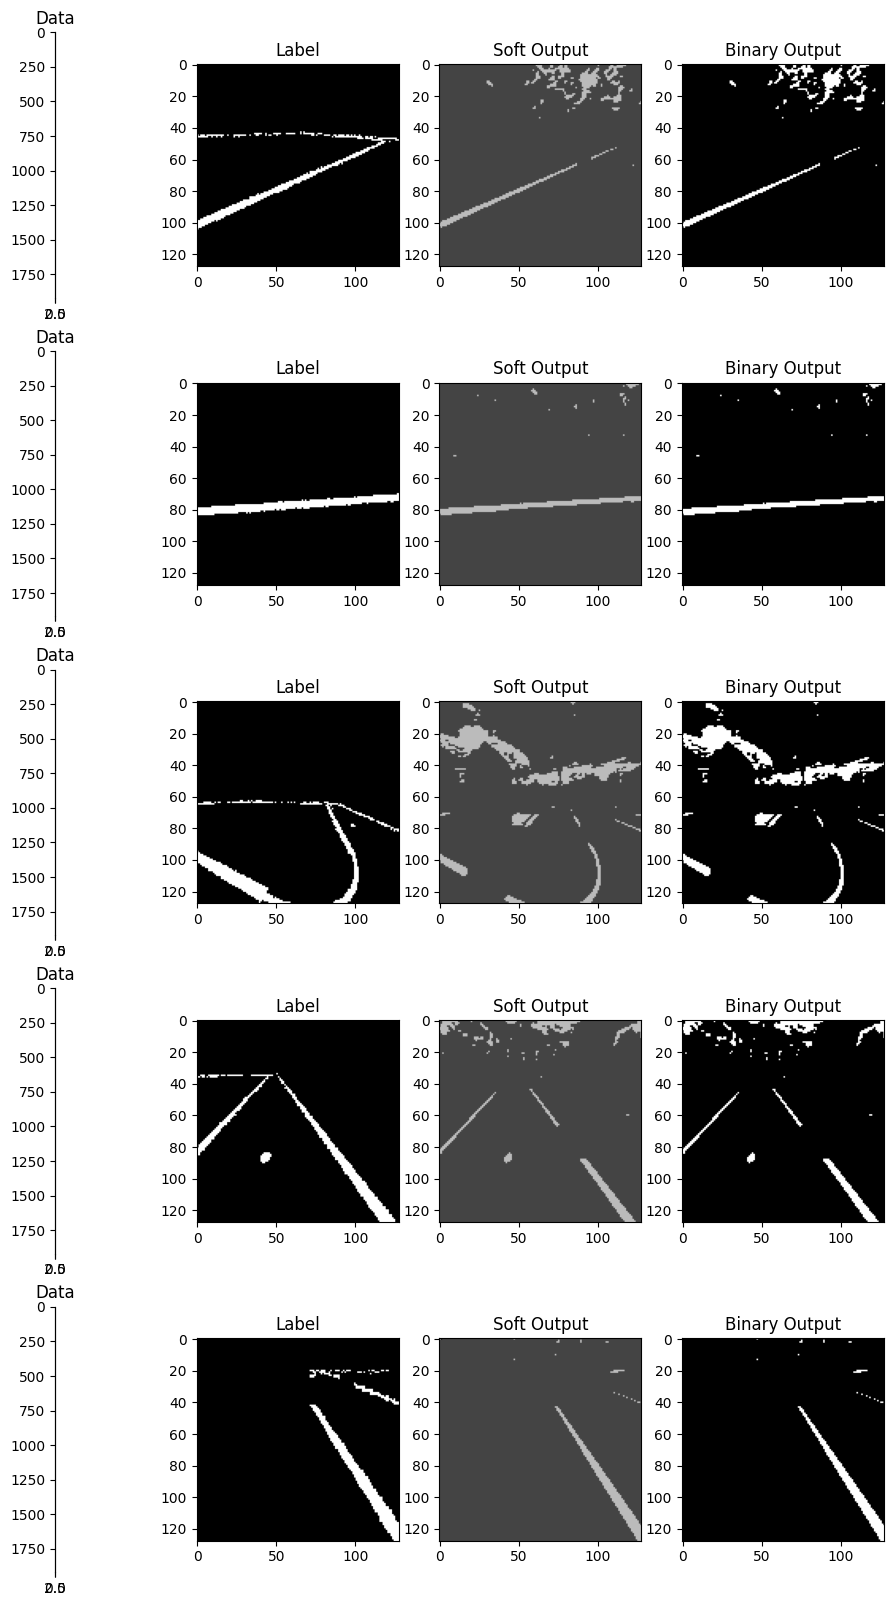

In [11]:
# graph_loss_history(train_loss_hist)

# graph_performance_history(
#     performance_hist = val_performance_hist,
#     split = 'Val',
#     metrics = ["Mean Pixel Accuracy", "Precision"]
# )

show_sample_results(
    model = model,
    dataset = train_dataset,
    device = device,
)

In [12]:
test_model_on_benchmarks(
    model = model,
    device = device,
    all_benchmarks = True,
    report_results = True
)

Testing on benchmark_1:   0%|          | 0/622 [00:00<?, ? frame/s]

AttributeError: 'str' object has no attribute 'unsqueeze'